# Market Place Analysis

## Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Reading CSVs

In [25]:
location = 'D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset/*.csv'
for file in glob.glob(location):
    print(file)

D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_April_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_August_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_December_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_February_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_January_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_July_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_June_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_March_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_May_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_November_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_October_2019.csv
D:\ANISH\Portfolio\Python Projects\Data Anal

In [26]:
df = pd.read_csv('D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset\Sales_January_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Function to combine CSV files

In [27]:
def combinedata(x):
        dfs = []
        for file in glob.glob(x):
            dfs.append(pd.read_csv(file))
            combineddfs = pd.concat(dfs,ignore_index=True)
        return combineddfs

filepath = 'D:\ANISH\Portfolio\Python Projects\Data Analysis Project\Dataset/*'

maindf = combinedata(filepath)
maindf.shape

(186849, 6)

## Final combined dataframe

In [28]:
maindf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Cleaning dataframe

### Removing NULLS

In [29]:
maindf.isna().sum()
nan = maindf[maindf.isna().any(axis=1)]
maindf = maindf.dropna(how='all')
maindf.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Removing Column names from rows

In [30]:
maindf[maindf['Order ID'] == "Order ID"]
maindf[maindf['Order ID'] == "Order ID"].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
dtype: int64

In [31]:
maindf = maindf.drop(maindf[maindf['Order ID'] == 'Order ID'].index)
maindf[maindf['Order ID'] == "Order ID"].count()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Changing Datatypes to increase speed

In [32]:
maindf.info()
maindf['Quantity Ordered'] = pd.to_numeric(maindf['Quantity Ordered'])
maindf['Price Each'] = pd.to_numeric(maindf['Price Each'])
maindf['Order ID'] = pd.to_numeric(maindf['Order ID'])
maindf['Order Date'] = pd.to_datetime(maindf['Order Date'])
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-

## adding columns

In [33]:
# Month column
maindf['Month'] = maindf['Order Date'].dt.month

# weekday
maindf['Weekday'] = maindf['Order Date'].dt.weekday

# Day column
maindf['Day'] = maindf['Order Date'].dt.day

# Hour column
maindf['Hour'] = maindf['Order Date'].dt.hour

# Minute column
maindf['Minute'] = maindf['Order Date'].dt.minute

In [34]:
# Sales Column
maindf['Sales'] = maindf['Quantity Ordered'] * maindf['Price Each']

In [35]:
# City State column
# City State
def get_city_state(x):
    return f"{x.split(', ')[1]} {x.split(', ')[2].split(' ')[0]}"

maindf['City State'] = maindf['Purchase Address'].apply(lambda x: get_city_state(x))

In [36]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Weekday           185950 non-null  int64         
 8   Day               185950 non-null  int64         
 9   Hour              185950 non-null  int64         
 10  Minute            185950 non-null  int64         
 11  Sales             185950 non-null  float64       
 12  City State        185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memor

In [37]:
maindf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Weekday,Day,Hour,Minute,Sales,City State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,19,8,46,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,6,7,22,30,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,12,14,38,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,12,14,38,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,30,9,27,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,1,17,20,56,8.97,Los Angeles CA
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,6,1,16,0,700.00,San Francisco CA
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,0,23,7,39,700.00,San Francisco CA
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,3,19,17,30,379.99,San Francisco CA


### 1. What product sold the most? 

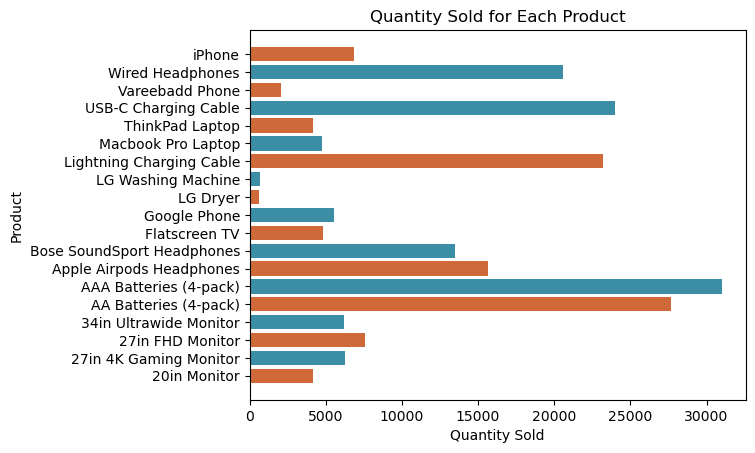

In [38]:
best_product = maindf.groupby('Product')
products = [product for product, maindf in best_product]
quantity_sold = best_product['Quantity Ordered'].sum()

plt.barh(products, quantity_sold,color=['#D0693A','#3B8EA5'])
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.title('Quantity Sold for Each Product')
plt.show()

### 3. Best time to display advertisements in the day.

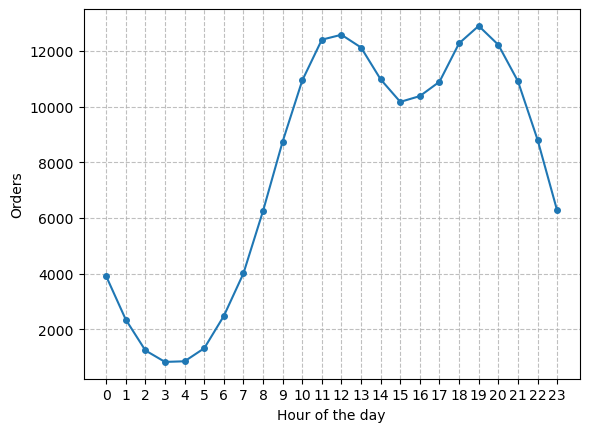

In [39]:
# heatmap
best_hours = maindf.groupby('Hour') 
hour = [hour for hour, maindf in best_hours]
count_hour = best_hours['Hour'].count()
plt.plot(hour,count_hour, marker='o',markersize = 4)
plt.xticks(hour)
plt.xlabel("Hour of the day")
plt.ylabel("Orders")
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

### 5. Best month for sales

C:\Users\Anish\AppData\Local\Temp\ipykernel_13884\3298425763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_month = maindf.groupby('Month').sum()


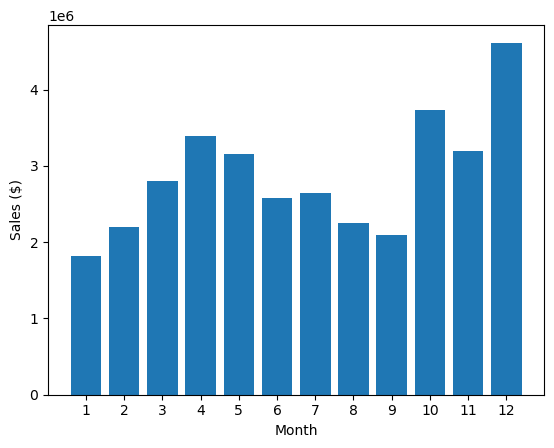

In [40]:
best_month = maindf.groupby('Month').sum()
months = range(1,13)
plt.bar(months,best_month['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

### What city sold the most products?

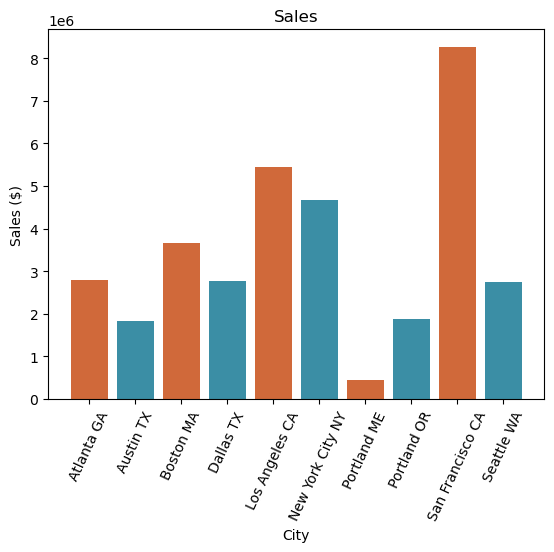

In [41]:
best_city = maindf.groupby('City State')
city = [city for city, maindf in best_city]
city_sales = best_city['Sales'].sum()

plt.bar(city, city_sales,color=['#D0693A','#3B8EA5'])
plt.xticks(city, rotation = 65)
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.title('Sales')
plt.show()

### Sales Trend

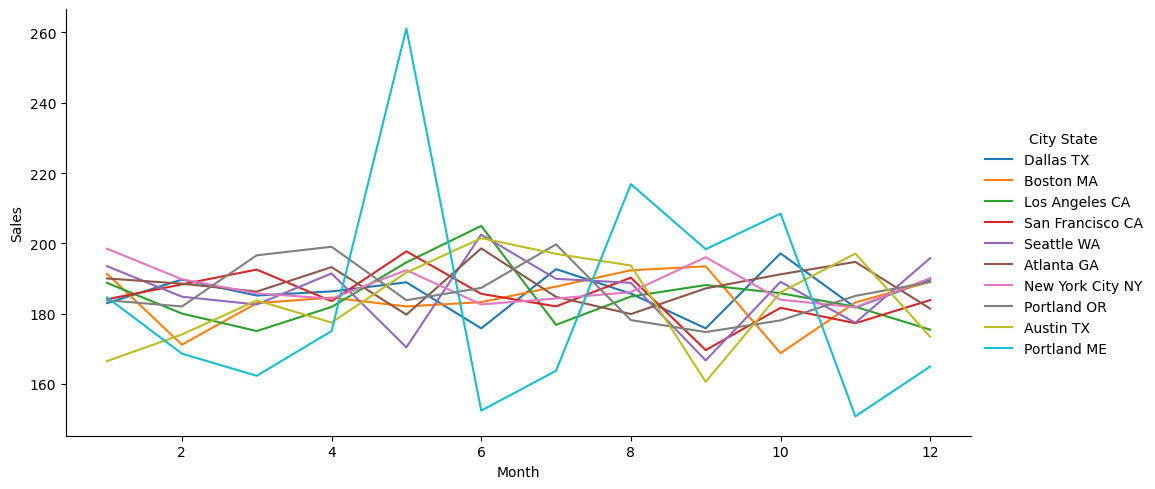

In [42]:
sns.relplot(
    data=maindf, 
    x="Month", y="Sales", hue="City State", 
    height=5, aspect=2,
    kind="line",
    errorbar=None
)

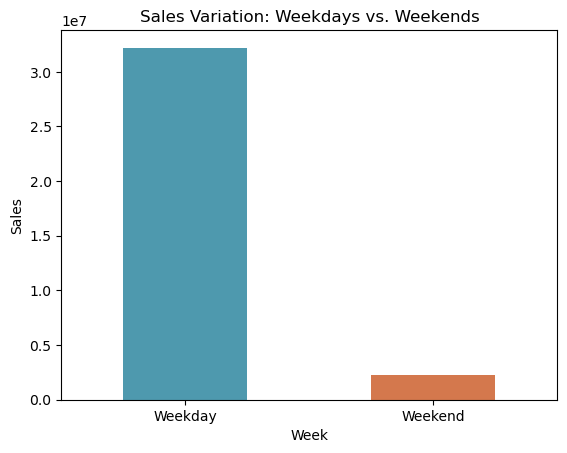

In [43]:
maindf['Weekend'] = maindf['Day'].isin([5, 6])
sales_by_weekend = maindf.groupby('Weekend')['Sales'].sum()
# Create a bar plot to visualize the sales variation between weekdays and weekends
sales_by_weekend.plot(kind='bar', color=['#3B8EA5', '#D0693A'], alpha=0.9)

# Customize the plot labels and title
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales Variation: Weekdays vs. Weekends')

# Customize the x-axis tick labels
plt.xticks([0, 1], ['Weekday', 'Weekend'],rotation = 'horizontal')

# Display the plot
plt.show()